### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



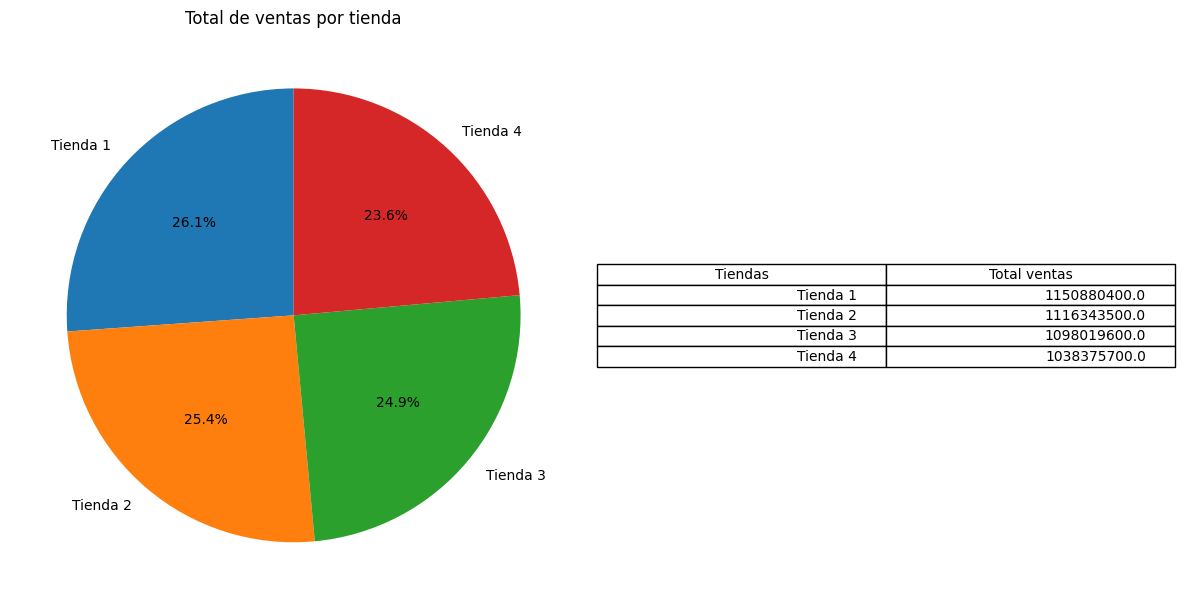

In [2]:
total_precio_tienda_1 = tienda['Precio'].sum()
total_precio_tienda_2 = tienda2['Precio'].sum()
total_precio_tienda_3 = tienda3['Precio'].sum()
total_precio_tienda_4 = tienda4['Precio'].sum()



nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valores_de_venta = [total_precio_tienda_1, total_precio_tienda_2, total_precio_tienda_3, total_precio_tienda_4]


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].pie(valores_de_venta, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Total de ventas por tienda')


table_data = np.array([nombres_tiendas, valores_de_venta]).transpose()
table = ax[1].table(cellText=table_data, colLabels=['Tiendas', 'Total ventas'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
ax[1].axis('off')

plt.tight_layout()
plt.show()


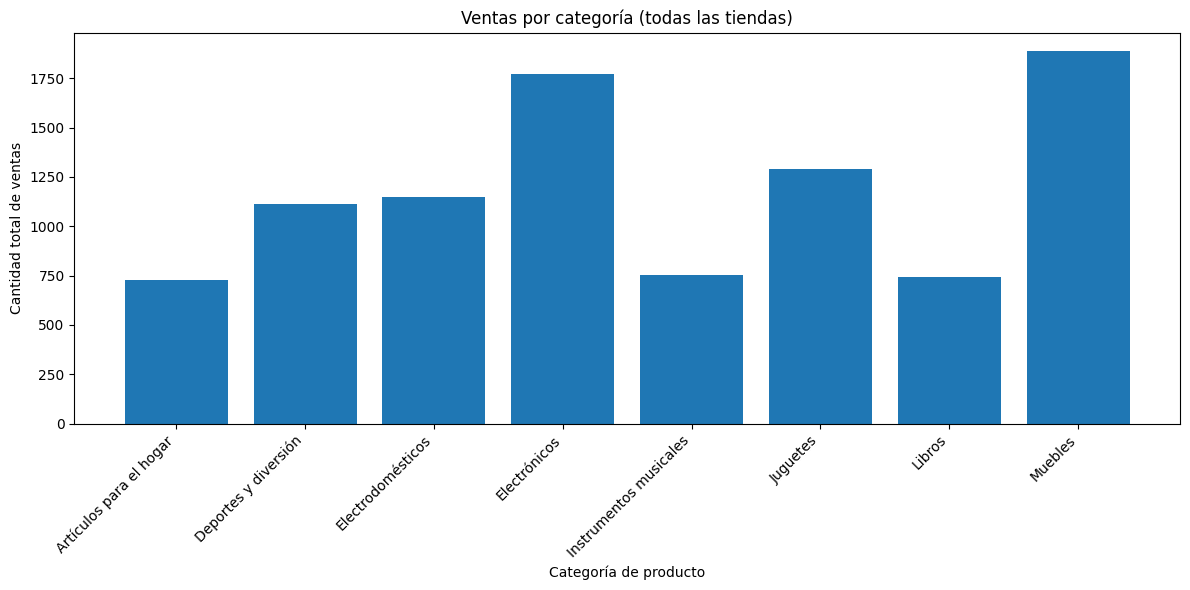

In [3]:
categorios_tienda_1 = tienda['Categoría del Producto'].value_counts()
categorios_tienda_2 = tienda2['Categoría del Producto'].value_counts()
categorios_tienda_3 = tienda3['Categoría del Producto'].value_counts()
categorios_tienda_4 = tienda4['Categoría del Producto'].value_counts()


todas_categorias = pd.concat([categorios_tienda_1, categorios_tienda_2, categorios_tienda_3, categorios_tienda_4])
todas_categorias = todas_categorias.groupby(todas_categorias.index).sum()


plt.figure(figsize=(12, 6))
plt.bar(todas_categorias.index, todas_categorias.values)


plt.xlabel("Categoría de producto")
plt.ylabel("Cantidad total de ventas")
plt.title("Ventas por categoría (todas las tiendas)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

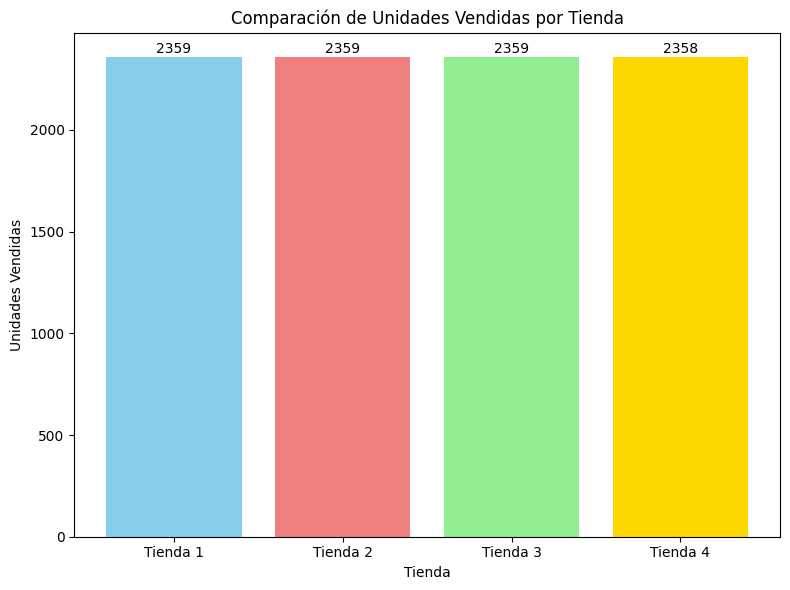

In [4]:
calificacion_tienda_1 = tienda['Lugar de Compra'].value_counts().sum()
calificacion_tienda_2 = tienda2['Lugar de Compra'].value_counts().sum()
calificacion_tienda_3 = tienda3['Lugar de Compra'].value_counts().sum()
calificacion_tienda_4 = tienda4['Lugar de Compra'].value_counts().sum()

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
sales_units = [calificacion_tienda_1, calificacion_tienda_2, calificacion_tienda_3,calificacion_tienda_4]

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, sales_units, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])


plt.xlabel("Tienda")
plt.ylabel("Unidades Vendidas")
plt.title("Comparación de Unidades Vendidas por Tienda")


for i, value in enumerate(sales_units):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


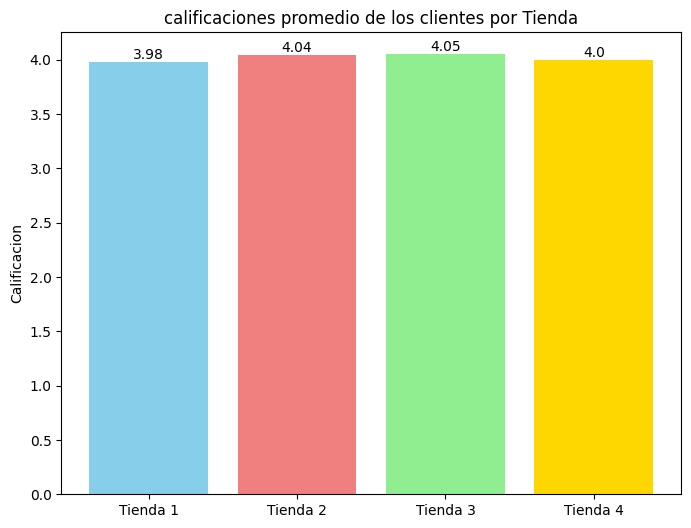

In [5]:
def promedio_calificacion(lista):
  return round(lista['Calificación'].sum() / len(lista) , 2)

calificacion_tienda_1 = promedio_calificacion(tienda)
calificacion_tienda_2 = promedio_calificacion(tienda2)
calificacion_tienda_3 = promedio_calificacion(tienda3)
calificacion_tienda_4 = promedio_calificacion(tienda4)


nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
sales_units = [calificacion_tienda_1, calificacion_tienda_2, calificacion_tienda_3,calificacion_tienda_4]

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, sales_units, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])



plt.ylabel("Calificacion")
plt.title("calificaciones promedio de los clientes por Tienda")


for i, v in enumerate(sales_units):
    plt.text(i, v + 0, str(v), ha='center', va='bottom')

plt.show()



# 4. Productos más y menos vendidos

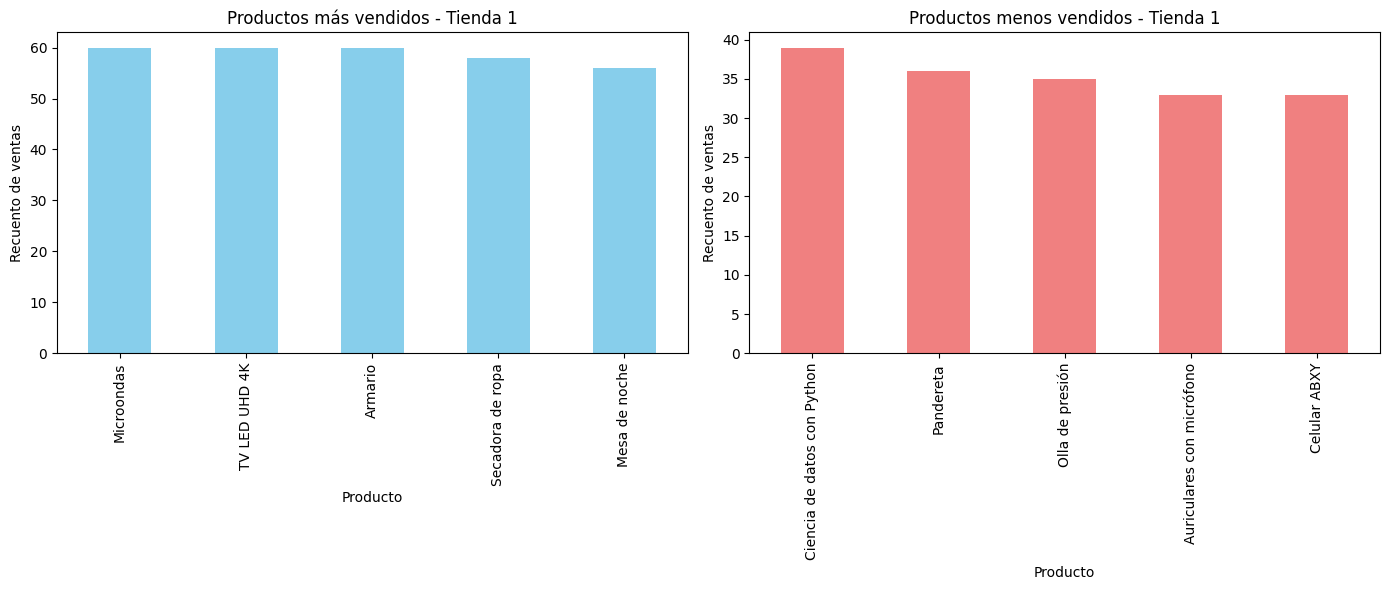

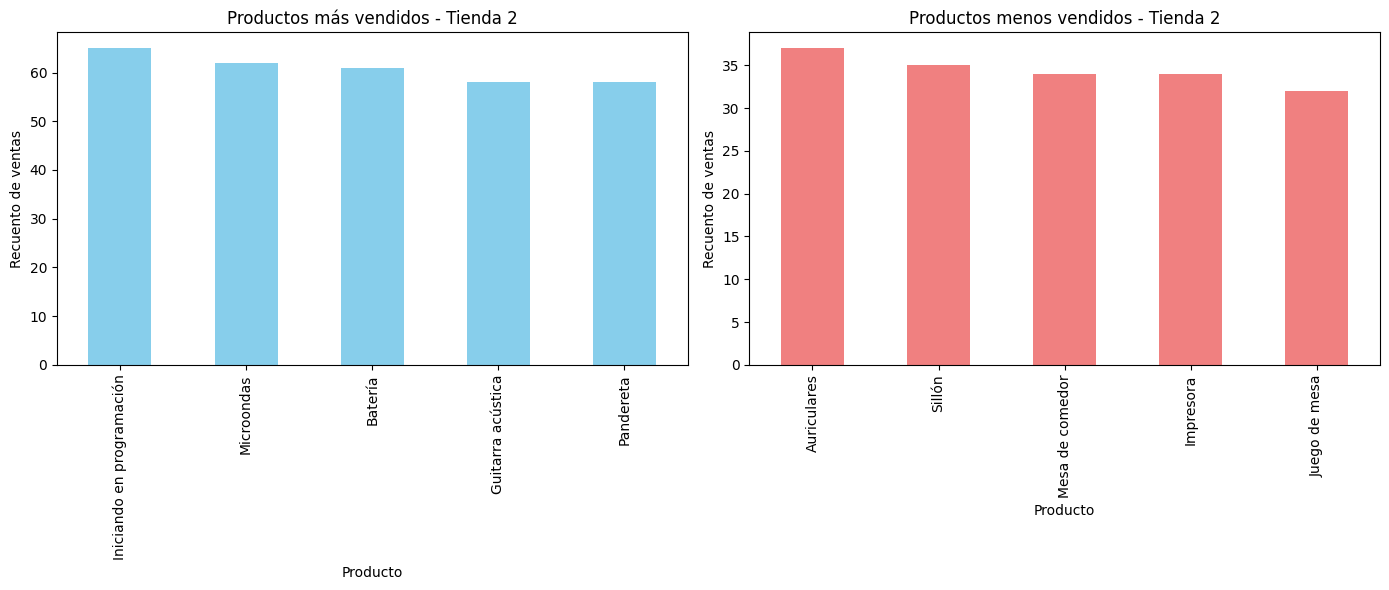

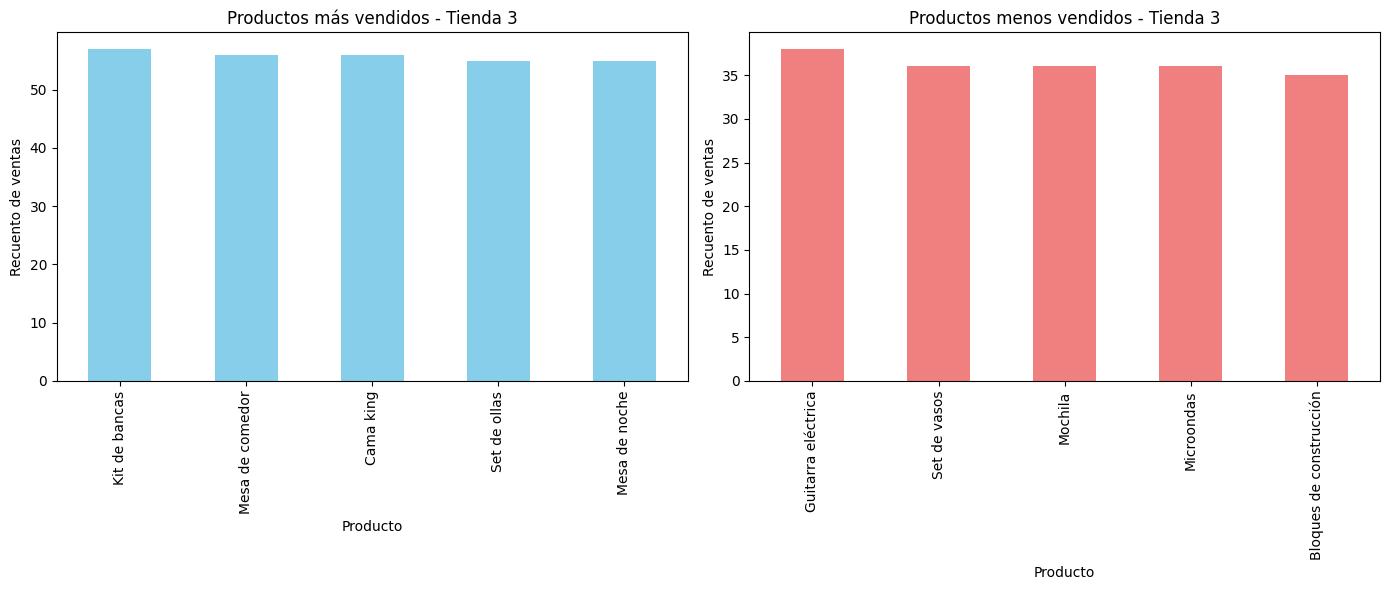

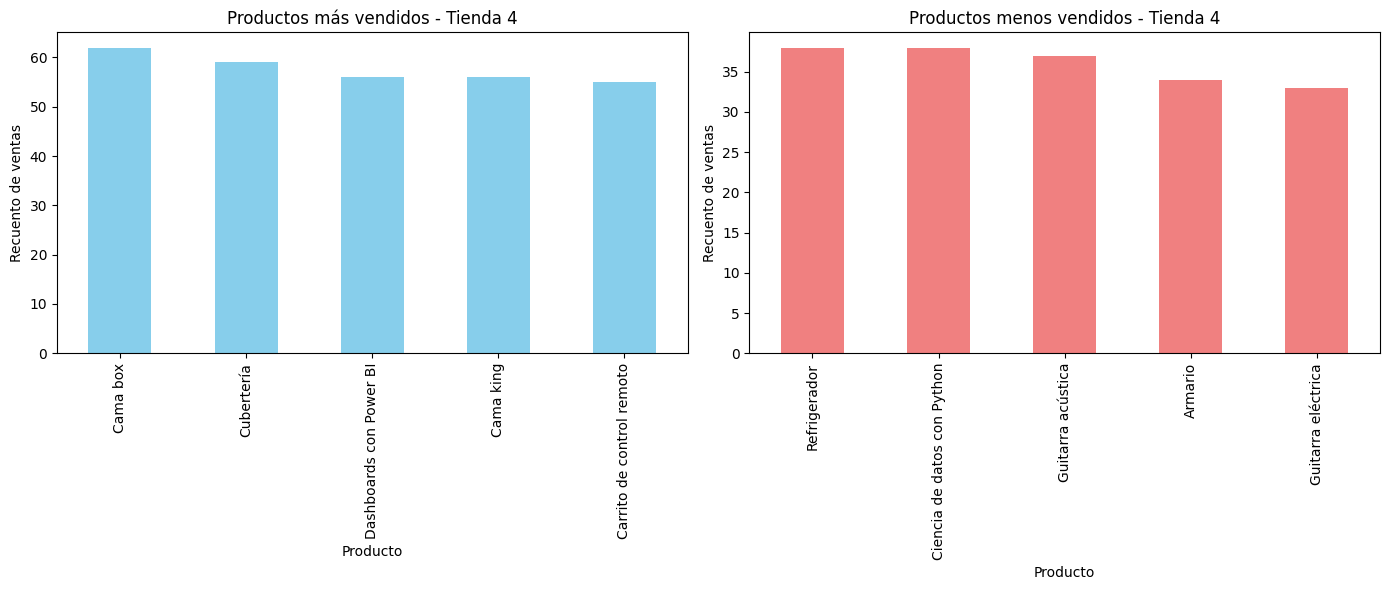

In [6]:

def most_least_sold(df, n=5):
    product_counts = df['Producto'].value_counts()
    most_sold = product_counts.head(n)
    least_sold = product_counts.tail(n)
    return most_sold, least_sold


most_sold_1, least_sold_1 = most_least_sold(tienda)
most_sold_2, least_sold_2 = most_least_sold(tienda2)
most_sold_3, least_sold_3 = most_least_sold(tienda3)
most_sold_4, least_sold_4 = most_least_sold(tienda4)



def plot_products(most_sold, least_sold, store_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    most_sold.plot(kind='bar', ax=axes[0], title=f'Productos más vendidos - {store_name}', color='skyblue')

    axes[0].set_ylabel("Recuento de ventas")

    least_sold.plot(kind='bar', ax=axes[1], title=f'Productos menos vendidos - {store_name}', color='lightcoral')

    axes[1].set_ylabel("Recuento de ventas")

    plt.tight_layout()
    plt.show()


plot_products(most_sold_1, least_sold_1, "Tienda 1")
plot_products(most_sold_2, least_sold_2, "Tienda 2")
plot_products(most_sold_3, least_sold_3, "Tienda 3")
plot_products(most_sold_4, least_sold_4, "Tienda 4")


# 5. Envío promedio por tienda

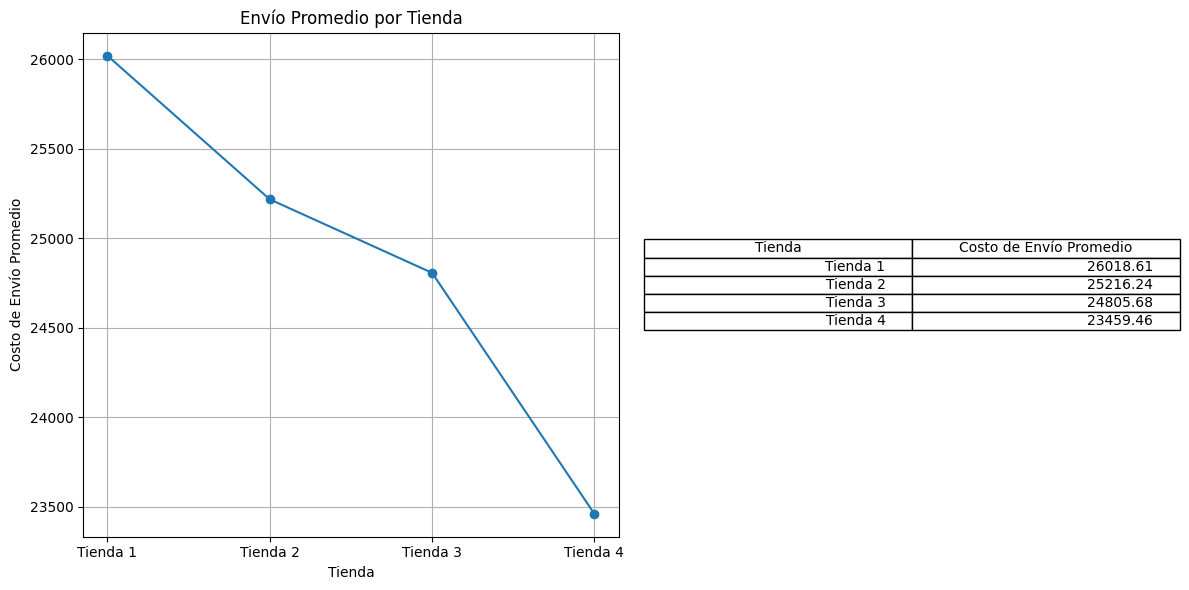

In [7]:
costos_envio_tienda_1 = round(tienda['Costo de envío'].mean(), 2)
costos_envio_tienda_2 = round(tienda2['Costo de envío'].mean(), 2)
costos_envio_tienda_3 = round(tienda3['Costo de envío'].mean(), 2)
costos_envio_tienda_4 = round(tienda4['Costo de envío'].mean(), 2)


nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envio_promedio = [costos_envio_tienda_1, costos_envio_tienda_2, costos_envio_tienda_3, costos_envio_tienda_4]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.plot(nombres_tiendas, envio_promedio, marker='o', linestyle='-')
ax1.set_title('Envío Promedio por Tienda')
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Costo de Envío Promedio')
ax1.grid(True)


table_data = np.array([nombres_tiendas, envio_promedio]).transpose()
table = ax2.table(cellText=table_data,
                  colLabels=['Tienda', 'Costo de Envío Promedio'],
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
ax2.axis('off')


plt.tight_layout()
plt.show()


# Informe para justificar el cierre de una tienda

## Recomendación:
**Basado en los datos y gráficos proporcionados, se recomienda cerrar la Tienda 4.**

---

## Justificación:

1. **Ventas totales**:  
   La Tienda 4 presenta las ventas totales más bajas en comparación con las otras tres tiendas, lo cual indica un rendimiento significativamente inferior.

2. **Unidades vendidas**:  
   Aunque la cantidad de unidades vendidas no se proporciona de forma directa, el gráfico sugiere que la Tienda 4 también tiene un volumen de ventas inferior.

3. **Costos de envío**:  
   Aunque el costo promedio de envío de la Tienda 4 no es significativamente más alto que el de las otras tiendas, el bajo rendimiento en ventas totales hace que este costo tenga un mayor impacto negativo en su rentabilidad.

---

## Consideraciones adicionales:

- **Análisis de productos**:  
  La Tienda 4 podría tener un bajo rendimiento en algunos productos específicos, lo cual afectaría sus resultados generales.

- **Localización geográfica**:  
  La ubicación de la Tienda 4 podría ser un factor determinante en su bajo desempeño.

---

## Conclusión:
Se recomienda realizar un análisis más profundo que considere la rentabilidad general y el impacto potencial en los clientes antes de tomar la decisión definitiva de cierre.

